## Code to generate Figure 5 C graphics
For each Ash1 phospho-form simulation, we calculated the trajectory-averaged interresidue distances for the unmodified and phosphorylated sequences using soursop and stored them as csv files. This code calculates distance difference maps between apo and phosphorylated simulations for each WT or mutant. In the distance calculations, data points for distances between i and j when i = j are excluded.

This code loads csv files from 'data/'.

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import copy
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
## load csv files with distance maps ##

apo = np.loadtxt('data/Ash1_dms/apo_dm.csv')
phospho = np.loadtxt('data/Ash1_dms/10xP_dm.csv')

seq11 = np.loadtxt('data/Ash1_dms/seq11_dm.csv')
seq12 = np.loadtxt('data/Ash1_dms/seq12_dm.csv')
seq16 = np.loadtxt('data/Ash1_dms/seq16_dm.csv')
seq17 = np.loadtxt('data/Ash1_dms/seq17_dm.csv')

In [7]:
## function to generate difference distance map data & account for NaN values##
# 'apo' map is the denominator for the upper left triangle
# 'phospho' map is the denominator for the lower right triangle
# the function takes one arguement: 'seq' is the distance map of the phospho-sequence for comparison to apo & phospho

def dist_div(seq):
    upper = seq / apo
    upper = np.nan_to_num(upper, nan = 0)
    
    lower = seq / phospho
    lower = np.nan_to_num(lower, nan = 0)
    
    full_square = upper + lower.transpose()
    
    squareT = full_square.transpose()
    masked_array = np.ma.masked_where(squareT == 0, squareT)
    
    return masked_array

In [8]:
## use above function to calculate difference distance maps (ddm) to be plotted ##

seq11_ddm = dist_div(seq11)
seq12_ddm = dist_div(seq12)
seq16_ddm = dist_div(seq16)
seq17_ddm = dist_div(seq17)

datasets = [seq11_ddm, seq12_ddm, seq16_ddm, seq17_ddm]

/home/usher/miniconda3/envs/labconda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/usher/miniconda3/envs/labconda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


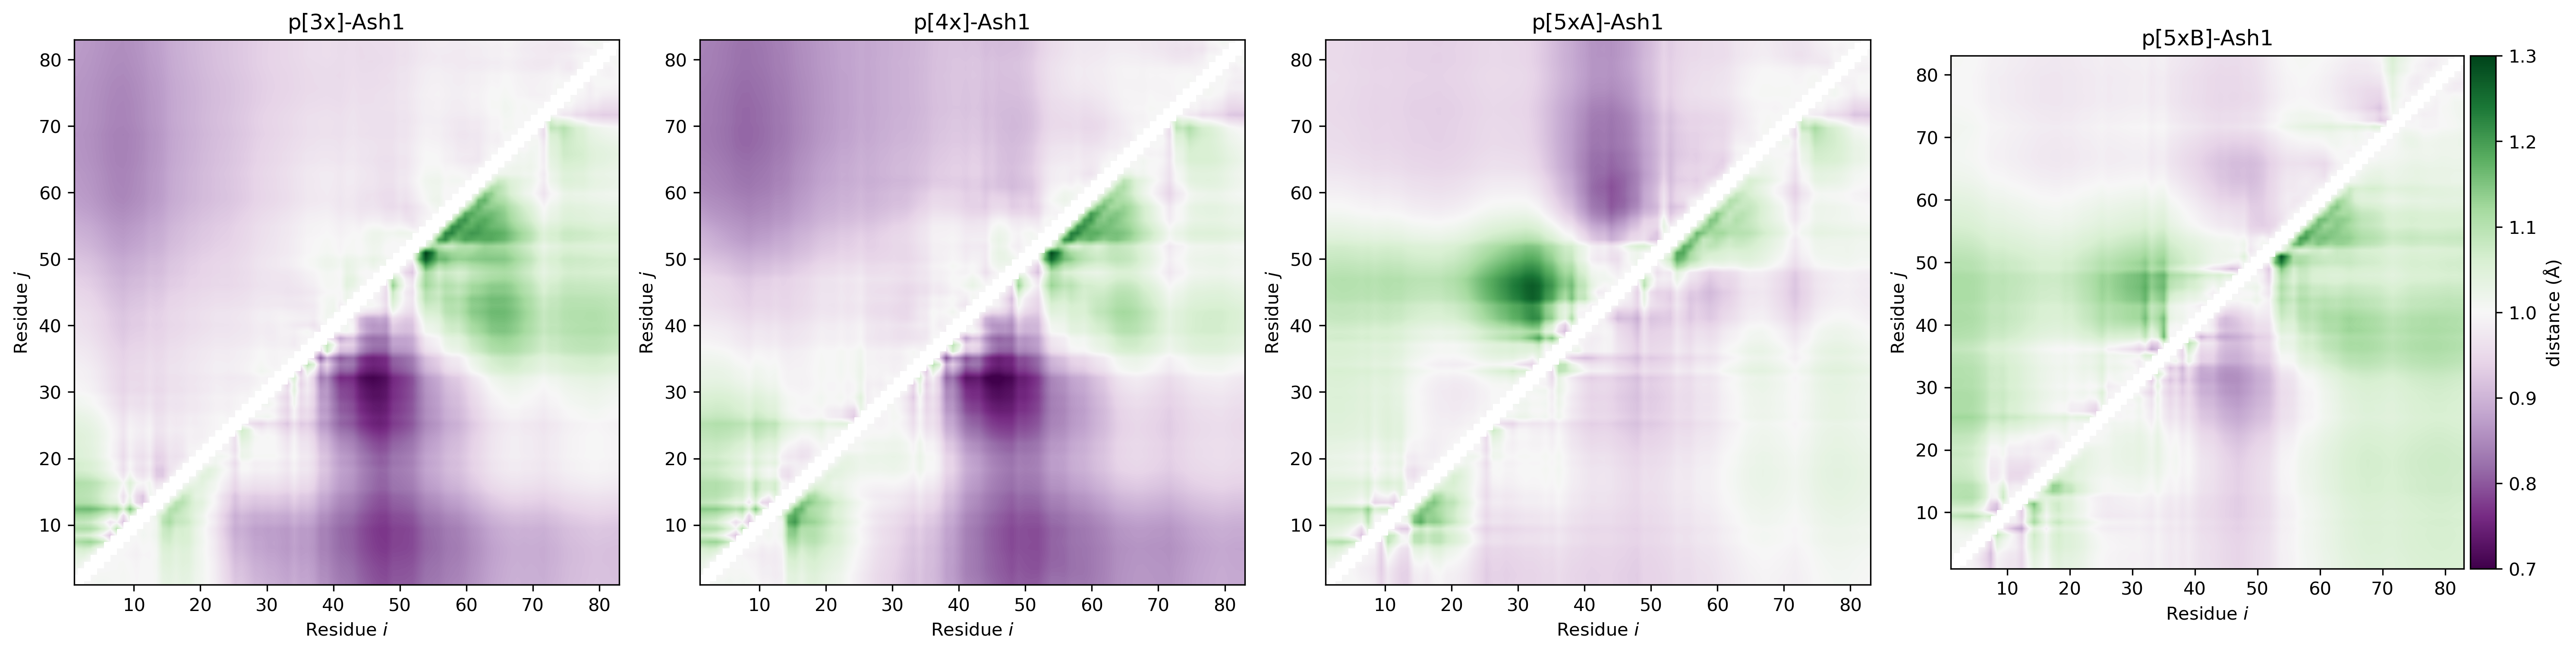

In [15]:
## generate relative distance map graphics (PANEL C) ##

fig, axes = plt.subplots(1, 4, figsize = (20, 5), dpi = 300)

titles = ['p[3x]-Ash1', 'p[4x]-Ash1', 'p[5xA]-Ash1', 'p[5xB]-Ash1']

# set up colormap #
cmap = copy.copy(cm.get_cmap("PRGn"))

for x in range(4):
    max_extent = datasets[x].shape[0]
    im = axes[x].imshow(datasets[x], cmap = cmap, interpolation = 'bilinear', origin = 'lower', 
                 extent = [1, max_extent, 1, max_extent], vmax = 1.3, vmin = 0.7)
    axes[x].set_ylabel('Residue $j$')
    axes[x].set_xlabel('Residue $i$')
    axes[x].set_xticks(np.arange(0, max_extent+1, 10), fontsize = 10)
    axes[x].set_yticks(np.arange(0, max_extent+1, 10), fontsize = 10)
    axes[x].set_xlim([1, max_extent])
    axes[x].set_ylim([1, max_extent])
    axes[x].set_title(str(titles[x]))
    
divider = make_axes_locatable(axes[3])
cax = divider.append_axes("right", size = "5%", pad = 0.05)
cb = fig.colorbar(im, cax = cax)
cb.set_label('distance (Å)')

plt.tight_layout()

plt.savefig('Ash1_distance_maps_5C.pdf', format = 'pdf', dpi = 300)

plt.show()